# Descriptive analysis

In this notebook, we analyze the data by using **descriptive statistics** in order to properly perform clustering methods.

## Libraries

In [4]:
# Data and numerical operations
import numpy as np
import pandas as pd

# Graph and Charts
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Data wrangling

In [5]:
# Read CSV
df = pd.read_csv("dataset.csv")

# Getting only the relevant columns
df = df[['job_title', 'experience_level']].sort_values('job_title')

# Function to counting entry-level vacancies
def count_exp_level(df, level):
    df = df.value_counts()
    
    if level in df.index: return df[level]
    else: return 0

# Aggregate over entry-level vacancies and average salary
df = df.groupby('job_title').agg(
    EN = ('experience_level', lambda x: count_exp_level(x, 'EN')),
    MI = ('experience_level', lambda x: count_exp_level(x, 'MI')),
    SE = ('experience_level', lambda x: count_exp_level(x, 'SE'))
)

# Select jobs with at least 10 vacancies
df = df.where(df.sum(axis = 1) >= 10).dropna().astype('int64')

df

,EN,MI,SE
job_title,,,
AI Scientist,7,3,1
Analytics Engineer,1,7,29
BI Data Analyst,5,6,0
Data Analyst,24,44,111
Data Architect,0,3,34
Data Engineer,18,81,199
Data Science Manager,0,4,21
Data Scientist,36,84,206
ETL Developer,0,2,8


## Descriptive statistics

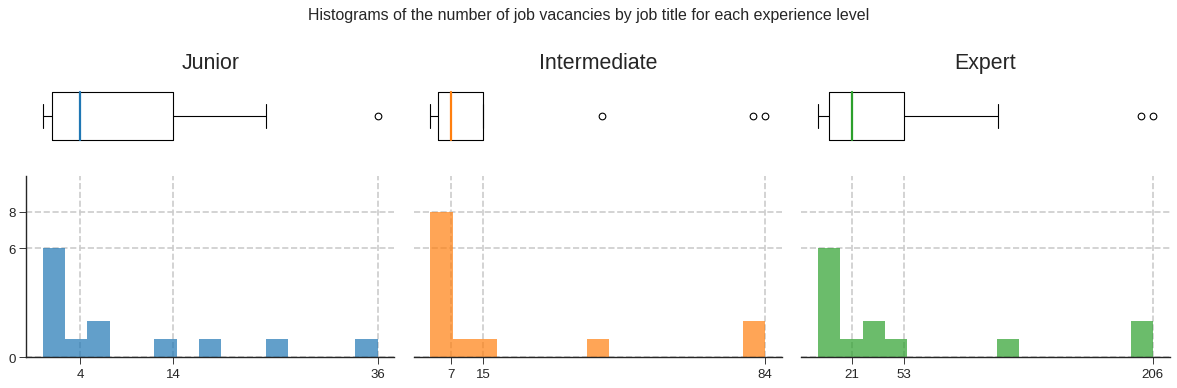

In [9]:
#---------- Figure and Axes ----------#

fig = plt.figure(figsize = (15, 5), dpi = 80)
gs = fig.add_gridspec(nrows = 3, ncols = 3)

plt.suptitle('Histograms of the number of job vacancies by job title for each experience level')

# Box and whiskers plots
ax_box = []
for i in range(3):
    ax_box.append(fig.add_subplot(gs[0, i]))
    
    # Remove spines and ticks and labels
    ax_box[-1].spines[:].set_visible(False)
    ax_box[-1].yaxis.set_visible(False)
    ax_box[-1].xaxis.set_visible(False)
    
# Histograms
ax_hist = []
for i in range(3):
    ax_hist.append(fig.add_subplot(gs[1:, i]))
    
    # Remove spines and ticks and labels
    if i > 0:
        ax_hist[-1].spines[['top', 'right', 'left']].set_visible(False)
        ax_hist[-1].yaxis.set_tick_params(left = False, labelleft = False)
        #ax_hist[-1].yaxis.set_visible(False)
        
    else:
        ax_hist[-1].spines[['top', 'right']].set_visible(False)
        
#---------- Style ----------#

plt.style.use('seaborn-ticks')
plt.rcParams.update({
    'font.size': 16
})

#---------- Box and Whiskers plots ----------#

titles = ['Junior', 'Intermediate', 'Expert']
for i in range(3):
    ax_box[i].set_title(titles[i])
    
    ax_box[i].boxplot(
        df.iloc[:, i],
        vert = False,
        widths = 0.6,
        medianprops = {
            'color': sns.color_palette()[i],
            'linewidth': 2
        }
    )
    
#---------- Histograms ----------#

hist_stats = []
for i in range(3):
    n, bins, patches = ax_hist[i].hist(
        df.iloc[:, i],
        color = sns.color_palette()[i],
        alpha = 0.7,
        bins = 15
    )
    
    hist_stats.append(n)
    
#---------- X and Y labels ----------#

for i in range(3):
    # Y-axis of the histograms
    ax_hist[i].set_ylim(0, np.max(hist_stats) + 2)
    ax_hist[i].set_yticks([0, np.max(hist_stats[0]), np.max(hist_stats)])
    ax_hist[i].grid(axis = 'both', linestyle = '--', linewidth = 1.5)
    
    # X-axis of the histograms
    ax_box[i].set_xlim(ax_hist[i].get_xlim())
    ax_hist[i].set_xticks([np.median(df.iloc[:,i]), np.quantile(df.iloc[:,i], 0.75), np.max(df.iloc[:, i])])



#----- Show and/or save figure -----#

plt.tight_layout()
plt.savefig('images/descriptive-analysis/descriptive_statistics.png', dpi = 100)

In [7]:
df.describe().round(1)

,EN,MI,SE
count,13.0,13.0,13.0
mean,8.6,20.8,52.4
std,11.3,29.5,73.1
min,0.0,2.0,0.0
25%,1.0,4.0,7.0
50%,4.0,7.0,21.0
75%,14.0,15.0,53.0
max,36.0,84.0,206.0


The expert level (SE) is the most sought-after level since its mean, median, and maximum values are the highest of all experience levels, whereas the junior level (EN) is the least sought-after since its mean, median, and maximum values are the lowest. Furthermore, most job titles have few vacancies at all experience levels, whereas some titles are outliers and concentrate the vacancies. We expect that these outliers will cluster apart from the others.

## Scatter plots

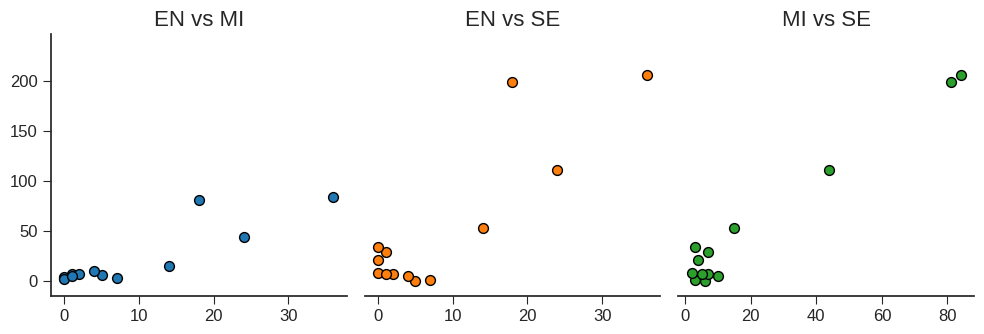

In [11]:
#----- Set figure and Axis -----#

fig = plt.figure(figsize = (10, 3.5), dpi = 100)
gs = fig.add_gridspec(nrows = 1, ncols = 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[0, i]))
    
    # Remove spines
    if i > 0: 
        ax[-1].spines[['top', 'right', 'left']].set_visible(False)
        ax[-1].yaxis.set_visible(False)
        
    else: ax[-1].spines[['top', 'right']].set_visible(False)
        
    ax[-1].set_ylim(-15, df.max().max()*1.2)
        
#----- Style -----#

plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 12})

#----- Scatter plots -----#

titles = ['EN vs MI', 'EN vs SE', 'MI vs SE']
idxs = [(0, 1), (0, 2), (1, 2)]

for i in range(3):
    ax[i].set_title(titles[i], fontsize = 16)
    ax[i].scatter(
        df.iloc[:,idxs[i][0]],
        df.iloc[:,idxs[i][1]],
        color = sns.color_palette()[i],
        s = 50,
        linewidth = 1,
        edgecolor = 'black'
    )

#----- Show and/or save figure -----#

plt.tight_layout()
plt.savefig('images/descriptive-analysis/data_scatter_plots.png', dpi = 100)

From the scatter plots above, we can clearly see that most job titles form a single globular cluster. Furthermore, as previously discussed, there are four outliers that can form different distant clusters.